<a href="https://colab.research.google.com/github/Chung-0218/Study/blob/main/Practice_RNN_Classification_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이토치 RNN 분류 모델
- 코드 출처: https://tutorials.pytorch.kr/intermediate/char_rnn_classification_tutorial.html

In [ ]:
# 이름(텍스트) 데이터 분류
!wget https://download.pytorch.org/tutorial/data.zip
!unzip data.zip

--2021-06-09 04:02:31--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.227.211.92, 13.227.211.25, 13.227.211.3, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.227.211.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  4.33MB/s    in 0.6s    

2021-06-09 04:02:32 (4.33 MB/s) - ‘data.zip’ saved [2882130/2882130]

Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Ita

In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

category_lines = {}
all_categories = []

def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

['data/names/Japanese.txt', 'data/names/Korean.txt', 'data/names/Irish.txt', 'data/names/Spanish.txt', 'data/names/Scottish.txt', 'data/names/Dutch.txt', 'data/names/Chinese.txt', 'data/names/French.txt', 'data/names/English.txt', 'data/names/Greek.txt', 'data/names/Polish.txt', 'data/names/Vietnamese.txt', 'data/names/Arabic.txt', 'data/names/Czech.txt', 'data/names/Portuguese.txt', 'data/names/Italian.txt', 'data/names/German.txt', 'data/names/Russian.txt']
Slusarski


In [ ]:
print(category_lines['Korean'][:5])

['Ahn', 'Baik', 'Bang', 'Byon', 'Cha']


In [ ]:
import torch

def letterToIndex(letter):
  return all_letters.find(letter)

def letterToTensor(letter):
  tensor = torch.zeros(1, n_letters)
  tensor[0][letterToIndex(letter)] = 1
  return tensor

def lineToTensor(line):
  tensor = torch.zeros(len(line), 1, n_letters)
  for li, letter in enumerate(line):
    tensor[li][0][letterToIndex(letter)] = 1
  return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


## 신경망 생성

In [ ]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(output)

tensor([[-2.8951, -2.9194, -2.9556, -2.8086, -2.8440, -2.8918, -2.8819, -2.9109,
         -2.7709, -2.8801, -2.9320, -2.8491, -2.9522, -2.7975, -2.9941, -2.9540,
         -2.8813, -2.9394]], grad_fn=<LogSoftmaxBackward>)


In [ ]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.8951, -2.9194, -2.9556, -2.8086, -2.8440, -2.8918, -2.8819, -2.9109,
         -2.7709, -2.8801, -2.9320, -2.8491, -2.9522, -2.7975, -2.9941, -2.9540,
         -2.8813, -2.9394]], grad_fn=<LogSoftmaxBackward>)


In [ ]:
def categoryFromOutput(output):
  top_n, top_i = output.topk(1)
  category_i = top_i[0].item()
  return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Greek', 9)


In [ ]:
import random

def randomChoice(l):
  return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
  category = randomChoice(all_categories)
  line = randomChoice(category_lines[category])
  category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
  line_tensor = lineToTensor(line)
  return category, line, category_tensor, line_tensor

for i in range(10):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  print('category: {}  \tline: {}'.format(category, line))

category: Irish  	line: O'Callaghann
category: Czech  	line: Savchak
category: Polish  	line: Wawrzaszek
category: Spanish  	line: Flores
category: Greek  	line: Dioletis
category: Scottish  	line: Miller
category: Polish  	line: Szewc
category: Chinese  	line: Qiu
category: Vietnamese  	line: Tong
category: English  	line: Church


## 손실함수

In [ ]:
criterion = nn.NLLLoss()

## 모델 학습

In [ ]:
learning_rate = 0.005

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [ ]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = 'O' if guess == category else 'X (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 4s) 2.7471 Kruse / French X (German)
10000 10% (0m 8s) 3.8696 Maly / Chinese X (Polish)
15000 15% (0m 13s) 1.4067 Geisler / German O
20000 20% (0m 17s) 3.1752 Dunkle / Japanese X (German)
25000 25% (0m 21s) 1.2799 Klimek / Polish O
30000 30% (0m 26s) 3.1866 Ramos / Greek X (Spanish)
35000 35% (0m 30s) 0.8836 Penners / Dutch O
40000 40% (0m 34s) 0.6981 Chong / Korean O
45000 45% (0m 38s) 0.8735 Jvykin / Russian O
50000 50% (0m 43s) 1.3875 Acone / French X (Italian)
55000 55% (0m 47s) 0.8325 Cassidy / Irish O
60000 60% (0m 51s) 0.6812 Wasem / Arabic O
65000 65% (0m 56s) 2.2331 Pelletier / Dutch X (French)
70000 70% (1m 0s) 1.0416 Chang / Korean O
75000 75% (1m 4s) 2.2018 Aquino / Italian X (Spanish)
80000 80% (1m 9s) 0.8071 Hughes / Scottish O
85000 85% (1m 13s) 1.4353 Page / French O
90000 90% (1m 17s) 0.7014 Hamilton / Scottish O
95000 95% (1m 22s) 0.1150 Tong / Vietnamese O
100000 100% (1m 26s) 2.4702 Nightingale / Irish X (English)


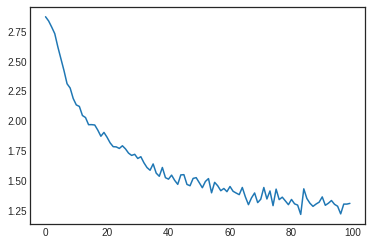

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure()
plt.plot(all_losses)
plt.show()

## 모델 테스트

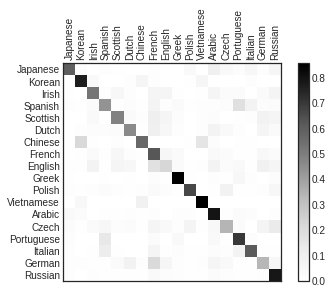

In [ ]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

def evaluate(line_tensor):
  hidden = rnn.initHidden()

  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

  return output

for i in range(n_confusion):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  output = evaluate(line_tensor)
  guess, guess_i = categoryFromOutput(output)
  category_i = all_categories.index(category)
  confusion[category_i][guess_i] += 1

for i in range(n_categories):
  confusion[i] = confusion[i] / confusion[i].sum()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

## 사용자 입력으로부터의 실행

In [ ]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Cha')
predict('Ahn')
predict('Kim')
predict('Bang')


> Cha
(-0.80) Korean
(-1.43) Vietnamese
(-1.86) Chinese

> Ahn
(-0.76) Korean
(-1.84) Vietnamese
(-1.95) Chinese

> Kim
(-1.16) Korean
(-1.31) Vietnamese
(-1.44) Chinese

> Bang
(-1.14) Korean
(-1.45) Chinese
(-1.74) Vietnamese
